In [226]:
import pathlib
import os

CURRENT_FILE_LOCATION = pathlib.Path(os.getcwd())
PROCESSING_RESULTS_FOLDER = CURRENT_FILE_LOCATION / "ProcessedData"
DATASET_FILE1 = PROCESSING_RESULTS_FOLDER / "acidentes2021.csv"
DATASET_FILE2 = PROCESSING_RESULTS_FOLDER / "datatran2021.csv"
DATASET_FILE3 = PROCESSING_RESULTS_FOLDER / "acidentes2021_todas_causas_tipos.csv"
CLUSTER_FILE2 = PROCESSING_RESULTS_FOLDER / "clustered.csv"
EXTRA_INFO = PROCESSING_RESULTS_FOLDER / "extra_info.csv"

In [227]:
import pandas as pd
import numpy as np
selected_clusters = [2,7,8,18,3]

# interesting_columns = ["causa_acidente",
#                        "tipo_acidente",
#                        "fase_dia",
#                        "sentido_via",
#                        "condicao_metereologica",
#                        "tipo_pista",
#                        "tracado_via"]

interesting_columns = ["tracado_via"]

#interesting_columns_extra = ["tipo_veiculo","ano_fabricacao_veiculo","idade","sexo"]

interesting_columns_extra = ["tipo_veiculo"]

CLUSTER_NUMBER = 3

cluster_filter= pd.read_csv(CLUSTER_FILE2).to_numpy()
cluster_filter = np.where(cluster_filter[:,1] == CLUSTER_NUMBER)[0]
cluster_file = pd.read_csv(DATASET_FILE2, delimiter=",", encoding="utf-8").filter(cluster_filter, axis=0)[interesting_columns]
extra_file_filter =  pd.read_csv(EXTRA_INFO, delimiter=",", encoding="utf-8").to_numpy()
extra_file_filter = np.where(extra_file_filter[:,-1] == CLUSTER_NUMBER)[0]
extra_file = pd.read_csv(EXTRA_INFO, delimiter=",", encoding="utf-8").filter(extra_file_filter, axis=0)[interesting_columns_extra]

In [228]:
cluster_list = cluster_file.values.tolist()

In [229]:
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, fpmax, fpgrowth

te = TransactionEncoder()
te_ary = te.fit(cluster_list).transform(cluster_list)
df = pd.DataFrame(te_ary, columns=te.columns_)

frequent_itemsets = apriori(df, min_support=0.05, use_colnames=True)
frequent_itemsets.sort_values(by=["support"], ascending=False)

support         itemsets
2  0.699781           (Reta)
0  0.114682          (Curva)
1  0.087655  (Não Informado)

In [230]:
association_rules(frequent_itemsets, metric="confidence", min_threshold=0.3)

Empty DataFrame
Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence, lift, leverage, conviction, zhangs_metric]
Index: []

In [231]:
if 'ano_fabricacao_veiculo' in extra_file:
    extra_file['ano_fabricacao_veiculo'] = extra_file['ano_fabricacao_veiculo'].astype(str)
if 'idade' in extra_file:
    extra_file['idade'] = extra_file['idade'].astype(str)
extra_file_list = extra_file.values.tolist()

In [232]:
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, fpmax, fpgrowth

te = TransactionEncoder()
te_ary = te.fit(extra_file_list).transform(extra_file_list)
df = pd.DataFrame(te_ary, columns=te.columns_)

frequent_itemsets = apriori(df, min_support=0.1, use_colnames=True)
frequent_itemsets.sort_values(["support"], ascending=False)

support       itemsets
0  0.502591    (Automóvel)
1  0.208981  (Motocicleta)

In [233]:
association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)

Empty DataFrame
Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence, lift, leverage, conviction, zhangs_metric]
Index: []

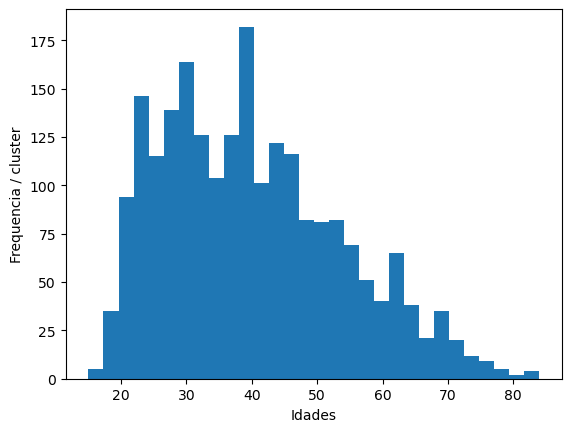

In [234]:
extra_file = pd.read_csv(EXTRA_INFO, delimiter=",", encoding="utf-8").filter(extra_file_filter, axis=0)
idades = extra_file["idade"].to_numpy().astype(float)
_filter = idades < 120.0
idades = idades[_filter]
import matplotlib.pyplot as plt
plt.hist(idades, bins=30)
plt.xlabel("Idades")
plt.ylabel("Frequencia / cluster")
plt.show()

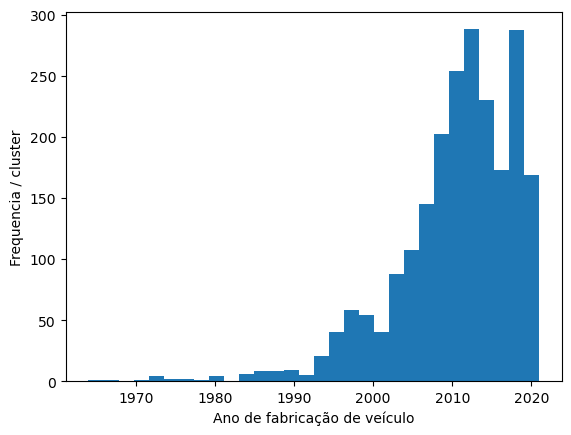

In [235]:
extra_file = pd.read_csv(EXTRA_INFO, delimiter=",", encoding="utf-8").filter(extra_file_filter, axis=0)
ano = extra_file["ano_fabricacao_veiculo"].to_numpy().astype(float)
_filter = ano > 1940.0
ano = ano[_filter]
import matplotlib.pyplot as plt
plt.hist(ano, bins=30)
plt.xlabel("Ano de fabricação de veículo")
plt.ylabel("Frequencia / cluster")
plt.show()